In [1]:
import numpy as np
from math import pi
import scipy.sparse as sp
import matplotlib.pyplot as plt

In [2]:
N=100
R=1
L=10
Q_pos=10
Q_f=0.1
eps=0.01

In [3]:
def infic(Q, phi, rr):
    return Q/(((np.exp(-phi)*rr**2).sum()-np.exp(-phi[0])*rr[0]**2/2-np.exp(-phi[-1])*rr[-1]**2/2)*dr)/I_d

In [4]:
rr = np.linspace(R, L, N)
dr = (L-R)/N

S_d=4*pi*R**2
I_d=4*pi
sigma_f=Q_f/S_d/eps

phi0=np.ones(N)
C0=Q_pos/(((np.exp(-phi0)*rr**2).sum()-np.exp(-phi0[0])*rr[0]**2/2-np.exp(-phi0[-1])*rr[-1]**2/2)*dr)/I_d

A=sp.diags([-1, 2, -1], [-1, 0, 1], shape=(N, N))/dr**2*eps
B=sp.diags([-np.concatenate(([0], 1/rr[1:-1])), np.concatenate((1/rr[1:-1],[0]))], [1, -1])/dr*eps
A=A.tocsr()
A[ 0, 0] =  eps*2/dr**2
A[ 0, 1] = -eps*2/dr**2
A[-1,-1] =  eps*2/dr**2
A[-1,-2] = -eps*2/dr**2

In [5]:
tol=1e-7
k=0
ep=1
phi=phi0
C=C0
while(ep>tol):
    P=C*(np.exp(-phi)+np.exp(phi))
    F=C*(np.exp(-phi)-np.exp(phi)+(np.exp(-phi)+np.exp(phi))*phi)
    F[0]+=(2/dr-2/R)*sigma_f*eps
    Coeff=A+B+sp.diags(P,0)
    phi_num=sp.linalg.spsolve(Coeff, F)
    ep=np.abs(phi_num-phi).max()
    C=Q_pos/(((np.exp(-phi_num)*rr**2).sum()-np.exp(-phi_num[0])*rr[0]**2/2-np.exp(-phi_num[-1])*rr[-1]**2/2)*dr)/I_d
    phi=phi_num
    k+=1

In [8]:
a=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0022387071920742427, 0.0028703693560332374, 0.00344574976791315, 0.004385454021376412, 0.005165860815830126, 0.005944760063353152, 0.007199541625330567, 0.008451810609090166, 0.009118146352455024, 0.010671422206709006, 0.011526703832053642, 0.012726208673239103, 0.013735260085514091, 0.014980996365907369, 0.017029250129071142, 0.0179991053211482, 0.0195835371453031, 0.02158656450054618, 0.023361952269255117, 0.02532829598251808, 0.027175040972612995, 0.028199670369838448, 0.03020772288151716, 0.03260321495438313, 0.03441830145893356, 0.03668062688625528, 0.038390185105657434, 0.04141030412347251, 0.043250516410201105, 0.04654701903197597, 0.04823999423514053, 0.05038674106444271, 0.05347972485057446, 0.05601340872542032, 0.05865463094798872, 0.0610199720822409, 0.06329184530679033, 0.06630744168381333, 0.06878685386915437, 0.07276225512538317, 0.07523111448220939, 0.07840600831824193, 0.08151205751110635, 0.08475077083387143, 0.08904677707069358, 0.09238900861603272, 0.09513877421761077, 0.09881668621285014, 0.10122876130195371, 0.10402375331145246, 0.10756246847342481, 0.11217857717519675, 0.11654192050825637, 0.119459023819141, 0.12387010613833914, 0.12835656580407176, 0.1313183930072335, 0.1364314896804895, 0.1393048741303841, 0.1448144556464115, 0.14923759834105516, 0.15245018085035497, 0.15680849902697894, 0.16214471264597702, 0.16732615144675758, 0.17187592808357918, 0.17670409838693482, 0.18101819518692527, 0.1864177257770123, 0.19081122004868573, 0.19610270977540664, 0.20207611323044292, 0.20655805025538349, 0.21175004188467886, 0.21605559591872872, 0.22194306919871568, 0.22789988963751437, 0.23411098299195604, 0.24176781385292911, 0.24695578535707605, 0.2513171186275614, 0.2576362528453692, 0.2619161785815973, 0.27002125339662886, 0.2771620006916625, 0.28142433838036596, 0.2866072847280772, 0.29152892294113564, 0.28869674477401314, 0.27811879047700694]
b=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004424351255181436, 0.005191510777894781, 0.006021356487288982, 0.006732794955174899, 0.0072954781070483045, 0.008446217391118322, 0.009400440455038035, 0.01077804403376258, 0.011702416532596169, 0.01268052004858478, 0.013858124841232305, 0.0147834923589021, 0.016066071638769157, 0.017143677038378175, 0.018709339177145293, 0.020495397988131613, 0.021886931830563016, 0.023511797590084278, 0.024899351357170866, 0.026753071449019065, 0.028478434110996938, 0.030135637982694828, 0.03179532940148323, 0.03381571514839561, 0.03561172414774398, 0.03796643622362093, 0.0399355785004688, 0.04186591504270471, 0.044561421069981566, 0.04704399306631074, 0.04909174183121873, 0.051902172534077154, 0.05483051296902576, 0.05675985449242546, 0.05937675403164219, 0.061166792917973334, 0.06399961154464634, 0.06747521233950719, 0.06971350721154827, 0.0729179653735435, 0.07615376662887915, 0.0790388237444529, 0.08093731968393027, 0.084821873220471, 0.09001189147011147, 0.09189048703286477, 0.09512330323169182, 0.09810338464612303, 0.10148993125514362, 0.10444712723634214, 0.10827496469921923, 0.1127794149707151, 0.11668735144990662, 0.11874704044084906, 0.12400521748076952, 0.12835892239858046, 0.1312439795141542, 0.13504495146845377, 0.1390319919451235, 0.1429827142342718, 0.14902297607944864, 0.15229708555997817, 0.15645825433298363, 0.16090250596488917, 0.16514476877304524, 0.17077209780119743, 0.17492928649885806, 0.18105511996394846, 0.18478843063738615, 0.18869188953181476, 0.19354360137714585, 0.20055002651227688, 0.20558880189881434, 0.20927982427171338, 0.21526038498671798, 0.2198509043875455, 0.22588519611970512, 0.23192048287070097, 0.23800900312943374, 0.24379304762428805, 0.24946863506599612, 0.25488800515738164, 0.2607879693466537, 0.2664272386008403, 0.27246849546485336, 0.2784948270463234, 0.28300375490258217, 0.28592513020567734, 0.2848594650321028, 0.2775336388505502]
a=np.array(a)
b=np.array(b)
bin_range=(0.0, 10.0)
bin_num = 100
bins = np.linspace(bin_range[0], bin_range[1], bin_num+1)
a /= 4*pi/3*(bins[1:]**3 - bins[:-1]**3)
b /= 4*pi/3*(bins[1:]**3 - bins[:-1]**3)

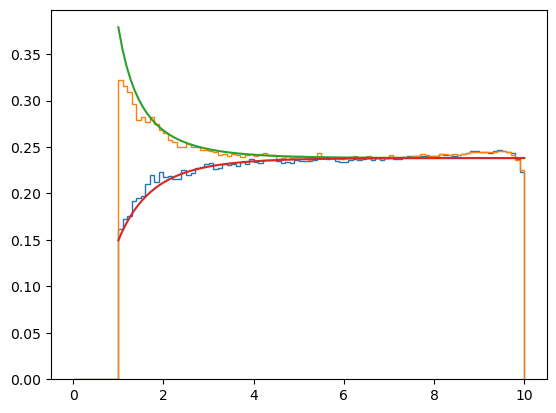

In [9]:
plt.stairs(a*100, bins)
plt.stairs(b*101, bins)
plt.plot(rr, np.exp(phi)/4.2)
plt.plot(rr, np.exp(-phi)/4.2)